# SIS multi-layer epidemic model

In [4]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcol
import matplotlib.cm as cm

## $\Delta$ - x: t, y: % infected 

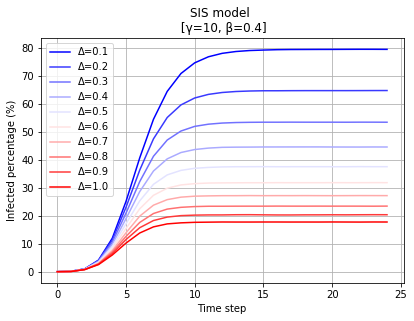

In [9]:
"""
    "naive_SIS_delta_variation"
"""
fig = plt.figure()
fig.set_size_inches(6.5, 4.5)

PARAMETERS = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
NUMBER_OF_NETWORKS = 10
NUM_TIMESTEPS = 25

DISPLAY_STEPS = 25

LABELS = []

scheme = cm.get_cmap("bwr", len(PARAMETERS))
colors = scheme(np.linspace(0.0, 1.0, len(PARAMETERS)))

# Make a user-defined colormap.
cm1 = mcol.LinearSegmentedColormap.from_list("MyCmapName",["r","b"])

# Make a normalizer that will map the time values from
# [start_time,end_time+1] -> [0,1].
cnorm = mcol.Normalize(vmin=min(PARAMETERS),vmax=max(PARAMETERS))

for (parameter, p) in zip(PARAMETERS, range(len(PARAMETERS))):

    all_data = np.zeros((NUMBER_OF_NETWORKS, NUM_TIMESTEPS))

    LABELS.append("\u0394=" + str(parameter))

    for net in range(NUMBER_OF_NETWORKS):
        file_name = "output/naive_SIS_delta_variation/{0}_graph_{1}_infected_ratios.csv".format(parameter, net)
        all_data[net,:] = np.loadtxt(file_name, delimiter=',')

    average = np.mean(all_data, axis=0)
    X = np.arange(0, DISPLAY_STEPS)
    Y = average[:DISPLAY_STEPS] * 100

    plt.plot(X, Y, color=colors[p])

plt.xlabel('Time step')
plt.ylabel('Infected percentage (%)')
plt.title("SIS model \n [\u03B3=10, \u03B2=0.4]")
plt.legend(LABELS)
plt.grid()
plt.show()

fig.savefig('img/SIS/naive_SIS_model_delta_variation.pdf')


## $\Delta$ - x: $\Delta$, y: stationary distribution

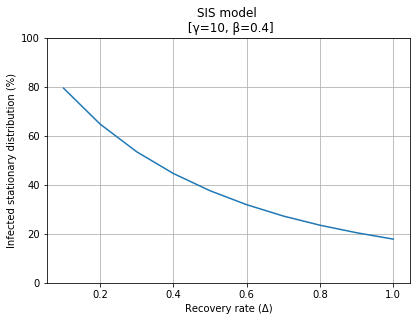

In [10]:
"""
    "naive_SIS_delta_variation"
"""
NUMBER_OF_NETWORKS = 10

PARAMETERS = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

fig = plt.figure()
fig.set_size_inches(6.5, 4.5)

results = np.zeros((len(PARAMETERS)))

for (delta, i) in zip(PARAMETERS, range(len(PARAMETERS))):

    nets_data = np.zeros((NUMBER_OF_NETWORKS))

    for net in range(NUMBER_OF_NETWORKS):
        file_name = "output/naive_SIS_delta_variation/{0}_graph_{1}_infected_ratios.csv".format(delta, net)
        nets_data[net] = np.loadtxt(file_name, delimiter=',')[-1]

    results[i] = np.average(nets_data)

plt.plot(PARAMETERS, results*100)

plt.xlabel('Recovery rate (\u0394)')
plt.ylabel('Infected stationary distribution (%)')
plt.title("SIS model \n [\u03B3=10, \u03B2=0.4]")
plt.ylim([0,100])
plt.grid()
plt.show()

fig.savefig('img/SIS/naive_SIS_model_delta_variation_stationary_dist.pdf')

## $\beta$ vs $\Delta$ - 2D map (stationary distribution)

/usr/local/lib/python3.5/dist-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'legend'
  s)


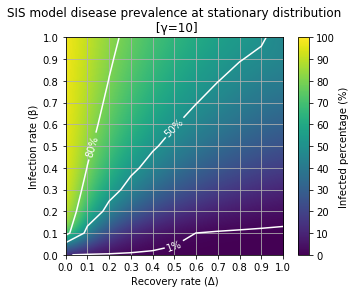

In [143]:
"""
    SIS_2d_grid_plot
"""
NUM_TIMESTEPS = 40
DISPLAY_STEPS = 40

NUMBER_OF_NETWORKS = 5

PARAMETERS = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

data = np.zeros((11,11))

fig = plt.figure()
fig.set_size_inches(5.5, 4.0)

for (beta, i) in zip(PARAMETERS, range(len(PARAMETERS))):
    for (delta, j) in zip(PARAMETERS, range(len(PARAMETERS))):

        nets_data = np.zeros((NUMBER_OF_NETWORKS))

        for net in range(NUMBER_OF_NETWORKS):
            file_name = "output/SIS_2d_grid_plot/{0}_{1}_graph_{2}_infected_ratios.csv".format(beta, delta, net)
            nets_data[net] = np.loadtxt(file_name, delimiter=',')[-1]

        data[i, j] = np.average(nets_data)

data = np.flip(data, axis=0) * 100

plt.imshow(data, interpolation='bicubic')

plt.xlabel('Recovery rate (\u0394)')
plt.ylabel('Infection rate (\u03B2)')
plt.title("SIS model disease prevalence at stationary distribution\n [\u03B3=10]")
ticks = np.linspace(0,100,11)
cbar = plt.colorbar()
cbar.set_ticks(ticks)
cbar.set_label('Infected percentage (%)')
plt.clim(0,100)

plt.xlim([0.0,1.0])
plt.ylim([1.0,0.0])

ticks_pos_x = np.arange(0,11)
ticks_labels_x = ['0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0']
plt.xticks(ticks_pos_x, ticks_labels_x)

ticks_pos_y = np.arange(0,11)
ticks_labels_y = ['1.0', '0.9', '0.8', '0.7', '0.6', '0.5', '0.4', '0.3', '0.2', '0.1', '0.0']
plt.yticks(ticks_pos_y, ticks_labels_y)

fmt_func = lambda x,pos: "{:1.0f}%".format(x)
fmt = matplotlib.ticker.FuncFormatter(fmt_func)

contour = plt.contour(data, levels = [1,50,80], colors='w', legend='sd')
contour.clabel(inline=True, fmt=fmt)

plt.grid()
plt.show()

fig.savefig('img/SIS/disease_stationary_prevalence.pdf')

## $\mu$ - x: t, y: % infected 

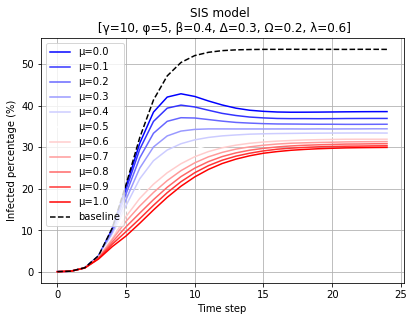

In [12]:
"""
    "SIS_mu"
"""
fig = plt.figure()
fig.set_size_inches(6.5, 4.5)

PARAMETERS = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
NUMBER_OF_NETWORKS = 10
NUM_TIMESTEPS = 25

DISPLAY_STEPS = 25

LABELS = []

scheme = cm.get_cmap("bwr", len(PARAMETERS))
colors = scheme(np.linspace(0.0, 1.0, len(PARAMETERS)))

# Make a user-defined colormap.
cm1 = mcol.LinearSegmentedColormap.from_list("MyCmapName",["r","b"])

# Make a normalizer that will map the time values from
# [start_time,end_time+1] -> [0,1].
cnorm = mcol.Normalize(vmin=min(PARAMETERS),vmax=max(PARAMETERS))

for (parameter, p) in zip(PARAMETERS, range(len(PARAMETERS))):

    all_data = np.zeros((NUMBER_OF_NETWORKS, NUM_TIMESTEPS))

    LABELS.append("\u03BC=" + str(parameter))

    for net in range(NUMBER_OF_NETWORKS):
        file_name = "output/SIS_mu/{0}_graph_{1}_infected_ratios.csv".format(parameter, net)
        all_data[net,:] = np.loadtxt(file_name, delimiter=',')

    average = np.mean(all_data, axis=0)
    X = np.arange(0, DISPLAY_STEPS)
    Y = average[:DISPLAY_STEPS] * 100

    plt.plot(X, Y, color=colors[p])

# Add baseline.
all_data = np.zeros((NUMBER_OF_NETWORKS, NUM_TIMESTEPS))

LABELS.append("baseline")

for net in range(NUMBER_OF_NETWORKS):
    file_name = "output/naive_SIS_delta_variation/0.3_graph_{0}_infected_ratios.csv".format(net)
    all_data[net,:] = np.loadtxt(file_name, delimiter=',')

average = np.mean(all_data, axis=0)
X = np.arange(0, DISPLAY_STEPS)
Y = average[:DISPLAY_STEPS] * 100

#print(Y[-1])

plt.plot(X, Y, color='black', linestyle='--')

plt.xlabel('Time step')
plt.ylabel('Infected percentage (%)')
plt.title("SIS model \n [\u03B3=10, \u03C6=5, \u03B2=0.4, \u0394=0.3, \u03A9=0.2, \u03BB=0.6]")
plt.legend(LABELS)
plt.grid()
plt.show()

fig.savefig('img/SIS/SIS_model_mu_variation.pdf')

## $\mu$ - x: $\mu$, y: stationary distribution

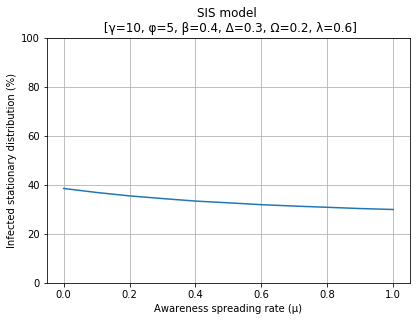

In [108]:
"""
    "SIS_mu"
"""
NUMBER_OF_NETWORKS = 10
NUM_TIMESTEPS = 25
DISPLAY_STEPS = 25

PARAMETERS = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
LABELS = []

fig = plt.figure()
fig.set_size_inches(6.5, 4.5)

results = np.zeros((len(PARAMETERS)))

for (delta, i) in zip(PARAMETERS, range(len(PARAMETERS))):

    nets_data = np.zeros((NUMBER_OF_NETWORKS))

    for net in range(NUMBER_OF_NETWORKS):
        file_name = "output/SIS_mu/{0}_graph_{1}_infected_ratios.csv".format(delta, net)
        nets_data[net] = np.loadtxt(file_name, delimiter=',')[-1]

    results[i] = np.average(nets_data)

plt.plot(PARAMETERS, results*100)

plt.xlabel('Awareness spreading rate (\u03BC)')
plt.ylabel('Infected stationary distribution (%)')
plt.title("SIS model \n [\u03B3=10, \u03C6=5, \u03B2=0.4, \u0394=0.3, \u03A9=0.2, \u03BB=0.6]")

plt.ylim([0,100])
plt.grid()
plt.show()

fig.savefig('img/SIS/SIS_model_mu_variation_2.pdf')

np.save("output/mu", results)

## $\Omega$ - x: t, y: % infected 

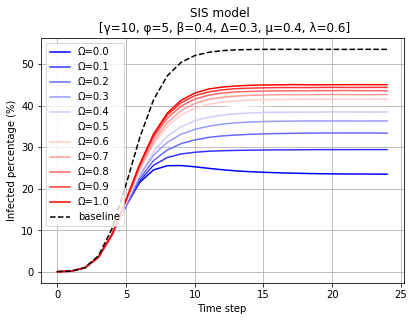

In [15]:
"""
    "SIS_omega"
"""
fig = plt.figure()
fig.set_size_inches(6.5, 4.5)

PARAMETERS = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
NUMBER_OF_NETWORKS = 10
NUM_TIMESTEPS = 25

DISPLAY_STEPS = 25

LABELS = []

scheme = cm.get_cmap("bwr", len(PARAMETERS))
colors = scheme(np.linspace(0.0, 1.0, len(PARAMETERS)))

# Make a user-defined colormap.
cm1 = mcol.LinearSegmentedColormap.from_list("MyCmapName",["r","b"])

# Make a normalizer that will map the time values from
# [start_time,end_time+1] -> [0,1].
cnorm = mcol.Normalize(vmin=min(PARAMETERS),vmax=max(PARAMETERS))

for (parameter, p) in zip(PARAMETERS, range(len(PARAMETERS))):

    all_data = np.zeros((NUMBER_OF_NETWORKS, NUM_TIMESTEPS))

    LABELS.append("\u03A9=" + str(parameter))

    for net in range(NUMBER_OF_NETWORKS):
        file_name = "output/SIS_omega/{0}_graph_{1}_infected_ratios.csv".format(parameter, net)
        all_data[net,:] = np.loadtxt(file_name, delimiter=',')

    average = np.mean(all_data, axis=0)
    X = np.arange(0, DISPLAY_STEPS)
    Y = average[:DISPLAY_STEPS] * 100

    plt.plot(X, Y, color=colors[p])

# Add baseline.
all_data = np.zeros((NUMBER_OF_NETWORKS, NUM_TIMESTEPS))

LABELS.append("baseline")

for net in range(NUMBER_OF_NETWORKS):
    file_name = "output/naive_SIS_delta_variation/0.3_graph_{0}_infected_ratios.csv".format(net)
    all_data[net,:] = np.loadtxt(file_name, delimiter=',')

average = np.mean(all_data, axis=0)
X = np.arange(0, DISPLAY_STEPS)
Y = average[:DISPLAY_STEPS] * 100

plt.plot(X, Y, color='black', linestyle='--')

plt.xlabel('Time step')
plt.ylabel('Infected percentage (%)')
plt.title("SIS model \n [\u03B3=10, \u03C6=5, \u03B2=0.4, \u0394=0.3, \u03BC=0.4, \u03BB=0.6]")
plt.legend(LABELS)
plt.grid()
plt.show()

fig.savefig('img/SIS/SIS_model_omega_variation.pdf')

## $\Omega$ - x: $\Omega$, y: stationary distribution

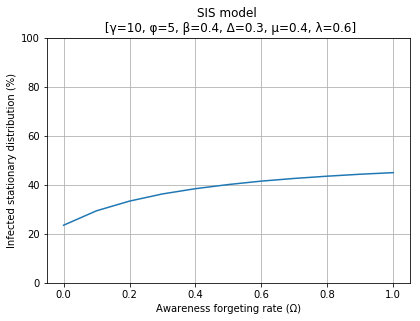

In [109]:
"""
    "SIS_omega"
"""
NUMBER_OF_NETWORKS = 10
NUM_TIMESTEPS = 25
DISPLAY_STEPS = 25

PARAMETERS = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
LABELS = []

fig = plt.figure()
fig.set_size_inches(6.5, 4.5)

results = np.zeros((len(PARAMETERS)))

for (delta, i) in zip(PARAMETERS, range(len(PARAMETERS))):

    nets_data = np.zeros((NUMBER_OF_NETWORKS))

    for net in range(NUMBER_OF_NETWORKS):
        file_name = "output/SIS_omega/{0}_graph_{1}_infected_ratios.csv".format(delta, net)
        nets_data[net] = np.loadtxt(file_name, delimiter=',')[-1]

    results[i] = np.average(nets_data)

plt.plot(PARAMETERS, results*100)

plt.xlabel('Awareness forgeting rate (\u03A9)')
plt.ylabel('Infected stationary distribution (%)')
plt.title("SIS model \n [\u03B3=10, \u03C6=5, \u03B2=0.4, \u0394=0.3, \u03BC=0.4, \u03BB=0.6]")

plt.ylim([0,100])
plt.grid()
plt.show()

fig.savefig('img/SIS/SIS_model_omega_variation_2.pdf')

np.save("output/omega", results)

## $\lambda$ - x: t, y: % infected 

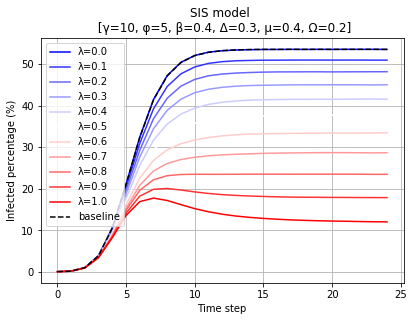

In [18]:
"""
    "SIS_lambda"
"""
fig = plt.figure()
fig.set_size_inches(6.5, 4.5)

PARAMETERS = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
NUMBER_OF_NETWORKS = 10
NUM_TIMESTEPS = 25

DISPLAY_STEPS = 25

LABELS = []

scheme = cm.get_cmap("bwr", len(PARAMETERS))
colors = scheme(np.linspace(0.0, 1.0, len(PARAMETERS)))

# Make a user-defined colormap.
cm1 = mcol.LinearSegmentedColormap.from_list("MyCmapName",["r","b"])

# Make a normalizer that will map the time values from
# [start_time,end_time+1] -> [0,1].
cnorm = mcol.Normalize(vmin=min(PARAMETERS),vmax=max(PARAMETERS))

for (parameter, p) in zip(PARAMETERS, range(len(PARAMETERS))):

    all_data = np.zeros((NUMBER_OF_NETWORKS, NUM_TIMESTEPS))

    LABELS.append("\u03BB=" + str(parameter))

    for net in range(NUMBER_OF_NETWORKS):
        file_name = "output/SIS_lambda/{0}_graph_{1}_infected_ratios.csv".format(parameter, net)
        all_data[net,:] = np.loadtxt(file_name, delimiter=',')

    average = np.mean(all_data, axis=0)
    X = np.arange(0, DISPLAY_STEPS)
    Y = average[:DISPLAY_STEPS] * 100

    plt.plot(X, Y, color=colors[p])

# Add baseline.
all_data = np.zeros((NUMBER_OF_NETWORKS, NUM_TIMESTEPS))

LABELS.append("baseline")

for net in range(NUMBER_OF_NETWORKS):
    file_name = "output/naive_SIS_delta_variation/0.3_graph_{0}_infected_ratios.csv".format(net)
    all_data[net,:] = np.loadtxt(file_name, delimiter=',')

average = np.mean(all_data, axis=0)
X = np.arange(0, DISPLAY_STEPS)
Y = average[:DISPLAY_STEPS] * 100

plt.plot(X, Y, color='black', linestyle='--')

plt.xlabel('Time step')
plt.ylabel('Infected percentage (%)')
plt.title("SIS model \n [\u03B3=10, \u03C6=5, \u03B2=0.4, \u0394=0.3, \u03BC=0.4, \u03A9=0.2]")
plt.legend(LABELS)
plt.grid()
plt.show()

fig.savefig('img/SIS/SIS_model_lambda_variation.pdf')

## $\lambda$ - x: $\lambda$, y: stationary distribution

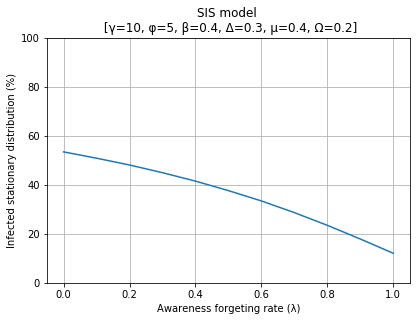

In [110]:
"""
    "SIS_lambda"
"""
NUMBER_OF_NETWORKS = 10
NUM_TIMESTEPS = 25
DISPLAY_STEPS = 25

PARAMETERS = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
LABELS = []

fig = plt.figure()
fig.set_size_inches(6.5, 4.5)

results = np.zeros((len(PARAMETERS)))

for (delta, i) in zip(PARAMETERS, range(len(PARAMETERS))):

    nets_data = np.zeros((NUMBER_OF_NETWORKS))

    for net in range(NUMBER_OF_NETWORKS):
        file_name = "output/SIS_lambda/{0}_graph_{1}_infected_ratios.csv".format(delta, net)
        nets_data[net] = np.loadtxt(file_name, delimiter=',')[-1]

    results[i] = np.average(nets_data)

plt.plot(PARAMETERS, results*100)

plt.xlabel('Awareness forgeting rate (\u03BB)')
plt.ylabel('Infected stationary distribution (%)')
plt.title("SIS model \n [\u03B3=10, \u03C6=5, \u03B2=0.4, \u0394=0.3, \u03BC=0.4, \u03A9=0.2]")

plt.ylim([0,100])
plt.grid()
plt.show()

fig.savefig('img/SIS/SIS_model_lambda_variation_2.pdf')

np.save("output/lambda", results)

## $\Delta$, $\Omega$, $\lambda$ - x: t, y: stationary distribution

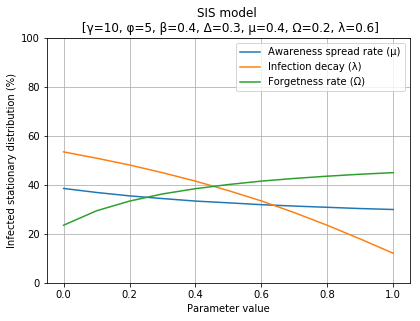

In [111]:
NUMBER_OF_NETWORKS = 10
NUM_TIMESTEPS = 25
DISPLAY_STEPS = 25

PARAMETERS = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
LABELS = []

fig = plt.figure()
fig.set_size_inches(6.5, 4.5)

results = np.zeros((len(PARAMETERS)))

for (p_file, n) in zip(['output/mu.npy', 'output/lambda.npy', 'output/omega.npy'], ['Awareness spread rate (\u03BC)', 'Infection decay (\u03BB)', 'Forgetness rate (\u03A9)']):
    results = np.load(p_file)

    plt.plot(PARAMETERS, results*100)
    LABELS.append(n)

plt.xlabel('Parameter value')
plt.ylabel('Infected stationary distribution (%)')
plt.title("SIS model \n [\u03B3=10, \u03C6=5, \u03B2=0.4, \u0394=0.3, \u03BC=0.4, \u03A9=0.2, \u03BB=0.6]")

plt.ylim([0,100])
plt.grid()
plt.legend(LABELS)
plt.show()

fig.savefig('img/SIS/SIS_all_params_stat_dist.pdf')

## Standard SIS model epidemic threshold ($\Delta$=1.0)

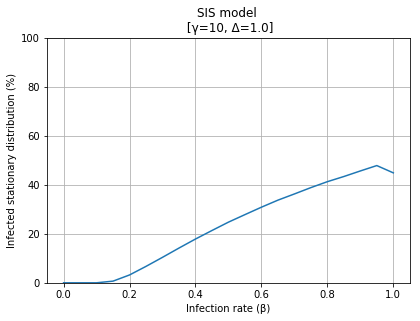

In [121]:
"""
    SIS_epidemic_onset_1
"""
NUMBER_OF_NETWORKS = 5

PARAMETERS = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5,
              0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]
PARAMETERS_STR = ['0.00', '0.05', '0.10', '0.15', '0.20', '0.25', '0.30', '0.35', '0.40', '0.45', '0.50',
                  '0.55', '0.60', '0.65', '0.70', '0.75', '0.80', '0.85', '0.90', '0.95', '1.00']
LABELS = []

fig = plt.figure()
fig.set_size_inches(6.5, 4.5)

results = np.zeros((len(PARAMETERS)))

for (delta, i) in zip(PARAMETERS, range(len(PARAMETERS))):

    nets_data = np.zeros((NUMBER_OF_NETWORKS))
    
    p_str = PARAMETERS_STR[i]

    for net in range(NUMBER_OF_NETWORKS):
        file_name = "output/SIS_epidemic_onset_1/{0}_graph_{1}_infected_ratios.csv".format(p_str, net)
        nets_data[net] = np.loadtxt(file_name, delimiter=',')[-1]

    results[i] = np.average(nets_data)


plt.plot(PARAMETERS, results*100)

plt.xlabel('Infection rate (\u03B2)')
plt.ylabel('Infected stationary distribution (%)')
plt.title("SIS model \n [\u03B3=10, \u0394=1.0]")

plt.ylim([0,100])
plt.grid()
plt.show()

fig.savefig('img/SIS/SIS_epidemic_threshold_1.pdf')

np.save("output/epidemic_onset_1", results)

## Epidemic threshold 2 ($\Delta$=1.0, $\mu$ = 0.4, $\Omega$ = 0.1, $\lambda$ = 0.6)

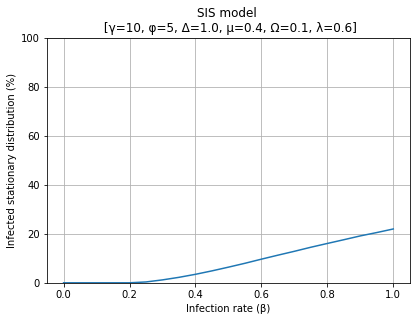

In [122]:
"""
    SIS_epidemic_onset_2
"""
NUMBER_OF_NETWORKS = 5

PARAMETERS = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5,
              0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]
PARAMETERS_STR = ['0.00', '0.05', '0.10', '0.15', '0.20', '0.25', '0.30', '0.35', '0.40', '0.45', '0.50',
                  '0.55', '0.60', '0.65', '0.70', '0.75', '0.80', '0.85', '0.90', '0.95', '1.00']
LABELS = []

fig = plt.figure()
fig.set_size_inches(6.5, 4.5)

results = np.zeros((len(PARAMETERS)))

for (delta, i) in zip(PARAMETERS, range(len(PARAMETERS))):

    nets_data = np.zeros((NUMBER_OF_NETWORKS))
    
    p_str = PARAMETERS_STR[i]

    for net in range(NUMBER_OF_NETWORKS):
        file_name = "output/SIS_epidemic_onset_2/{0}_graph_{1}_infected_ratios.csv".format(p_str, net)
        nets_data[net] = np.loadtxt(file_name, delimiter=',')[-1]

    results[i] = np.average(nets_data)

plt.plot(PARAMETERS, results*100)

plt.xlabel('Infection rate (\u03B2)')
plt.ylabel('Infected stationary distribution (%)')
plt.title("SIS model \n [\u03B3=10, \u03C6=5, \u0394=1.0, \u03BC=0.4, \u03A9=0.1, \u03BB=0.6]")

plt.ylim([0,100])
plt.grid()
plt.show()

fig.savefig('img/SIS/SIS_epidemic_threshold_2.pdf')

np.save("output/epidemic_onset_2", results)

## Epidemic threshold 3 ($\Delta$=1.0, $\mu$ = 0.8, $\Omega$ = 0.1, $\lambda$ = 0.7)

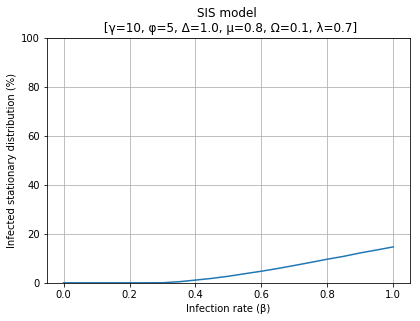

In [119]:
"""
    SIS_epidemic_onset_3
"""
NUMBER_OF_NETWORKS = 5

PARAMETERS = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5,
              0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]
PARAMETERS_STR = ['0.00', '0.05', '0.10', '0.15', '0.20', '0.25', '0.30', '0.35', '0.40', '0.45', '0.50',
                  '0.55', '0.60', '0.65', '0.70', '0.75', '0.80', '0.85', '0.90', '0.95', '1.00']
LABELS = []

fig = plt.figure()
fig.set_size_inches(6.5, 4.5)

results = np.zeros((len(PARAMETERS)))

for (delta, i) in zip(PARAMETERS, range(len(PARAMETERS))):

    nets_data = np.zeros((NUMBER_OF_NETWORKS))
    
    p_str = PARAMETERS_STR[i]

    for net in range(NUMBER_OF_NETWORKS):
        file_name = "output/SIS_epidemic_onset_3/{0}_graph_{1}_infected_ratios.csv".format(p_str, net)
        nets_data[net] = np.loadtxt(file_name, delimiter=',')[-1]

    results[i] = np.average(nets_data)

plt.plot(PARAMETERS, results*100)

plt.xlabel('Infection rate (\u03B2)')
plt.ylabel('Infected stationary distribution (%)')
plt.title("SIS model \n [\u03B3=10, \u03C6=5, \u0394=1.0, \u03BC=0.8, \u03A9=0.1, \u03BB=0.7]")

plt.ylim([0,100])
plt.grid()
plt.show()

fig.savefig('img/SIS/SIS_epidemic_threshold_3.pdf')

np.save("output/epidemic_onset_3", results)

## Epidemic threshold 4 ($\Delta$=1.0, $\mu$ = 0.95, $\Omega$ = 0.1, $\lambda$ = 0.95)

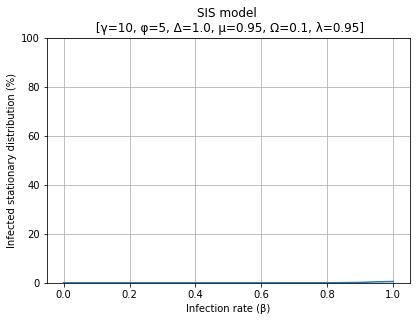

In [125]:
"""
    SIS_epidemic_onset_4
"""
NUMBER_OF_NETWORKS = 5

PARAMETERS = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5,
              0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]
PARAMETERS_STR = ['0.00', '0.05', '0.10', '0.15', '0.20', '0.25', '0.30', '0.35', '0.40', '0.45', '0.50',
                  '0.55', '0.60', '0.65', '0.70', '0.75', '0.80', '0.85', '0.90', '0.95', '1.00']
LABELS = []

fig = plt.figure()
fig.set_size_inches(6.5, 4.5)

results = np.zeros((len(PARAMETERS)))

for (delta, i) in zip(PARAMETERS, range(len(PARAMETERS))):

    nets_data = np.zeros((NUMBER_OF_NETWORKS))
    
    p_str = PARAMETERS_STR[i]

    for net in range(NUMBER_OF_NETWORKS):
        file_name = "output/SIS_epidemic_onset_4/{0}_graph_{1}_infected_ratios.csv".format(p_str, net)
        nets_data[net] = np.loadtxt(file_name, delimiter=',')[-1]

    results[i] = np.average(nets_data)

plt.plot(PARAMETERS, results*100)

plt.xlabel('Infection rate (\u03B2)')
plt.ylabel('Infected stationary distribution (%)')
plt.title("SIS model \n [\u03B3=10, \u03C6=5, \u0394=1.0, \u03BC=0.95, \u03A9=0.1, \u03BB=0.95]")

plt.ylim([0,100])
plt.grid()
plt.show()

fig.savefig('img/SIS/SIS_epidemic_threshold_4.pdf')

np.save("output/epidemic_onset_4", results)

## All epidemic thresholds

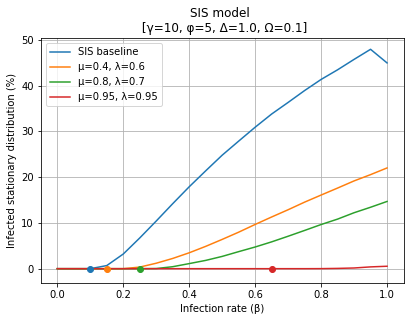

In [144]:
PARAMETERS = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5,
              0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]
FILES = ['output/epidemic_onset_1.npy', 'output/epidemic_onset_2.npy', 'output/epidemic_onset_3.npy', 'output/epidemic_onset_4.npy']

LABELS = ['SIS baseline', '\u03BC=0.4, \u03BB=0.6', '\u03BC=0.8, \u03BB=0.7', '\u03BC=0.95, \u03BB=0.95']

fig = plt.figure()
fig.set_size_inches(6.5, 4.5)

results = np.zeros((len(PARAMETERS)))

#print(PARAMETERS)

for f in FILES:
    results = np.load(f)
    #print(results)
    
    plt.plot(PARAMETERS, results*100)
    
# Plot epidemic thresholds.
plt.scatter([0.1], [0.0], zorder=10)
plt.scatter([0.15], [0.0], zorder=10)
plt.scatter([0.25], [0.0], zorder=10)
plt.scatter([0.65], [0.0], zorder=10)
    
plt.xlabel('Infection rate (\u03B2)')
plt.ylabel('Infected stationary distribution (%)')
plt.title("SIS model \n [\u03B3=10, \u03C6=5, \u0394=1.0, \u03A9=0.1]")

#plt.ylim([0,100])
plt.grid()
plt.legend(LABELS)
plt.show()

fig.savefig('img/SIS/SIS_epidemic_threshold_ALL.pdf')

## Different topologies

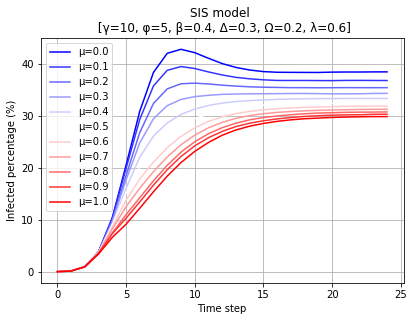

In [149]:
"""
    "diff_topology_1"
"""
fig = plt.figure()
fig.set_size_inches(6.5, 4.5)

PARAMETERS = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

NUMBER_OF_NETWORKS = 6
NETS = [(0,1), (0,2), (1,0), (1,2), (2,0), (2,1)]

NUM_TIMESTEPS = 25
DISPLAY_STEPS = 25

LABELS = []

scheme = cm.get_cmap("bwr", len(PARAMETERS))
colors = scheme(np.linspace(0.0, 1.0, len(PARAMETERS)))

# Make a user-defined colormap.
cm1 = mcol.LinearSegmentedColormap.from_list("MyCmapName",["r","b"])

# Make a normalizer that will map the time values from
# [start_time,end_time+1] -> [0,1].
cnorm = mcol.Normalize(vmin=min(PARAMETERS),vmax=max(PARAMETERS))

for (parameter, p) in zip(PARAMETERS, range(len(PARAMETERS))):

    all_data = np.zeros((NUMBER_OF_NETWORKS, NUM_TIMESTEPS))

    LABELS.append("\u03BC=" + str(parameter))
    
    for (net, net_comb) in zip(range(NUMBER_OF_NETWORKS), NETS):
        
        file_name = "output/diff_topology_1/{0}_graph_{1}_graph_{2}_infected_ratios.csv".format(parameter, net_comb[0], net_comb[1])
        all_data[net,:] = np.loadtxt(file_name, delimiter=',')

    average = np.mean(all_data, axis=0)
    X = np.arange(0, DISPLAY_STEPS)
    Y = average[:DISPLAY_STEPS] * 100

    plt.plot(X, Y, color=colors[p])

plt.xlabel('Time step')
plt.ylabel('Infected percentage (%)')
plt.title("SIS model \n [\u03B3=10, \u03C6=5, \u03B2=0.4, \u0394=0.3, \u03A9=0.2, \u03BB=0.6]")
plt.legend(LABELS)
plt.grid()
plt.show()

#fig.savefig('img/SIS/SIS_diff_top_1.pdf')

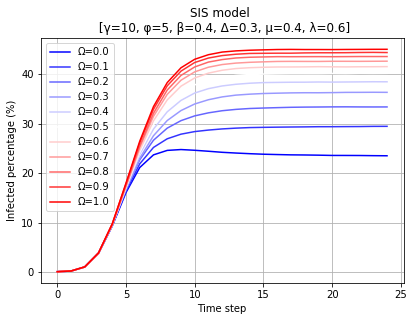

In [151]:
"""
    "diff_topology_2"
"""
fig = plt.figure()
fig.set_size_inches(6.5, 4.5)

PARAMETERS = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

NUMBER_OF_NETWORKS = 6
NETS = [(0,1), (0,2), (1,0), (1,2), (2,0), (2,1)]

NUM_TIMESTEPS = 25
DISPLAY_STEPS = 25

LABELS = []

scheme = cm.get_cmap("bwr", len(PARAMETERS))
colors = scheme(np.linspace(0.0, 1.0, len(PARAMETERS)))

# Make a user-defined colormap.
cm1 = mcol.LinearSegmentedColormap.from_list("MyCmapName",["r","b"])

# Make a normalizer that will map the time values from
# [start_time,end_time+1] -> [0,1].
cnorm = mcol.Normalize(vmin=min(PARAMETERS),vmax=max(PARAMETERS))

for (parameter, p) in zip(PARAMETERS, range(len(PARAMETERS))):

    all_data = np.zeros((NUMBER_OF_NETWORKS, NUM_TIMESTEPS))

    LABELS.append("\u03A9=" + str(parameter))
    
    for (net, net_comb) in zip(range(NUMBER_OF_NETWORKS), NETS):
        
        file_name = "output/diff_topology_2/{0}_graph_{1}_graph_{2}_infected_ratios.csv".format(parameter, net_comb[0], net_comb[1])
        all_data[net,:] = np.loadtxt(file_name, delimiter=',')

    average = np.mean(all_data, axis=0)
    X = np.arange(0, DISPLAY_STEPS)
    Y = average[:DISPLAY_STEPS] * 100

    plt.plot(X, Y, color=colors[p])

plt.xlabel('Time step')
plt.ylabel('Infected percentage (%)')
plt.title("SIS model \n [\u03B3=10, \u03C6=5, \u03B2=0.4, \u0394=0.3, \u03BC=0.4, \u03BB=0.6]")
plt.legend(LABELS)
plt.grid()
plt.show()

#fig.savefig('img/SIS/SIS_diff_top_2.pdf')